# imports

In [5]:
import datetime
import importlib
import pandas as pd, numpy as np
import scipy
import matplotlib.pyplot as plt
from numpy_ext import rolling_apply as rolling_apply_ext
import talib
from talib import MA_Type
import numpy.linalg

In [9]:
import algo.data.read
importlib.reload(algo.data.read)

<module 'algo.data.read' from '/home/junlim/projects/mean_reversal/algo/data/read.py'>

In [7]:
symbols_pool = [s for _, s in sorted([(m, s) for s, m in algo.data.read.df_gemini_202310.mean().items() if m > 10 and m < 500], reverse=True)]
# remove duplicates within USDT / BUSD swap
symbols_pool = [s for s in symbols_pool if s not in [s.replace('USDT', 'BUSD') for s in symbols_pool if 'USDT' in s]]
symbols_pool

['BCH/USD',
 'QNT/USD',
 'AAVE/USD',
 'LTC/USD',
 'COMP/USD',
 'SOL/USD',
 'ZEC/USD',
 'INJ/USD',
 'LINK/USD',
 'AVAX/USD']

In [21]:
algo.data.read.df_gemini_202309

,BTC/USD,ETH/USD,ZEC/USD,BCH/USD,LTC/USD,BAT/USD,DAI/USD,LINK/USD,OXT/USD,AMP/USD,...,SAMO/USD,IMX/USD,IOTX/USD,BUSD/USD,AVAX/USD,ATOM/USD,USDT/USD,PEPE/USD,XRP/USD,HNT/USD
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-01 00:00:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
2023-09-01 00:01:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
2023-09-01 00:02:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
2023-09-01 00:03:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
2023-09-01 00:04:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 11:55:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
2023-09-30 11:56:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534
2023-09-30 11:57:00+00:00,34506.42,1826.82,27.35,260.6,70.8,0.20364,0.99969,10.3111,0.06664,0.0016,...,0.003858,0.63332,0.020177,0.99861,10.306,6.818,1.0002,9.340000e-07,0.56059,1.5534


In [10]:
set_size, set_num = 2, 6
symbols_sets = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_gemini_202309, 10, set_size, set_num, symbols_pool, high_corr=True)
symbols_sets

abs_corrs: [(nan, 'QNT/USD', 'BCH/USD'), (nan, 'AAVE/USD', 'BCH/USD'), (nan, 'AAVE/USD', 'QNT/USD'), (nan, 'LTC/USD', 'BCH/USD'), (nan, 'LTC/USD', 'QNT/USD'), (nan, 'LTC/USD', 'AAVE/USD'), (nan, 'COMP/USD', 'BCH/USD'), (nan, 'COMP/USD', 'QNT/USD'), (nan, 'COMP/USD', 'AAVE/USD'), (nan, 'COMP/USD', 'LTC/USD'), (nan, 'SOL/USD', 'BCH/USD'), (nan, 'SOL/USD', 'QNT/USD'), (nan, 'SOL/USD', 'AAVE/USD'), (nan, 'SOL/USD', 'LTC/USD'), (nan, 'SOL/USD', 'COMP/USD'), (nan, 'ZEC/USD', 'BCH/USD'), (nan, 'ZEC/USD', 'QNT/USD'), (nan, 'ZEC/USD', 'AAVE/USD'), (nan, 'ZEC/USD', 'LTC/USD'), (nan, 'ZEC/USD', 'COMP/USD'), (nan, 'ZEC/USD', 'SOL/USD'), (nan, 'INJ/USD', 'BCH/USD'), (nan, 'INJ/USD', 'QNT/USD'), (nan, 'INJ/USD', 'AAVE/USD'), (nan, 'INJ/USD', 'LTC/USD'), (nan, 'INJ/USD', 'COMP/USD'), (nan, 'INJ/USD', 'SOL/USD'), (nan, 'INJ/USD', 'ZEC/USD'), (nan, 'LINK/USD', 'BCH/USD'), (nan, 'LINK/USD', 'QNT/USD'), (nan, 'LINK/USD', 'AAVE/USD'), (nan, 'LINK/USD', 'LTC/USD'), (nan, 'LINK/USD', 'COMP/USD'), (nan, 'LIN

IndexError: list index out of range

In [847]:
set_size, set_num = 2, 6
symbols_sets_low_corr = algo.data.read.get_high_corr_symbols_set_of(algo.data.read.df_gemini_202309, 10, set_size, set_num, symbols_pool, high_corr=False)
symbols_sets_low_corr

start_symbol: EGLDUSDT
(0.005776412349793026, 'EGLDUSDT', 'QNTUSDT')
start_symbol: TRBUSDT
(0.038605806813175034, 'TRBUSDT', 'RPLUSDT')
start_symbol: CREAMBUSD
(0.7847216100092885, 'CREAMBUSD', 'WNXMUSDT')
start_symbol: DCRUSDT
(0.7866866013569517, 'DCRUSDT', 'KSMUSDT')
start_symbol: ETCUSDT
(0.8245124827124991, 'ETCUSDT', 'XMRUSDT')
start_symbol: BCHUSDT
(0.8533584437153164, 'BCHUSDT', 'BIFIUSDT')


[['EGLDUSDT', 'QNTUSDT'],
 ['TRBUSDT', 'RPLUSDT'],
 ['CREAMBUSD', 'WNXMUSDT'],
 ['DCRUSDT', 'KSMUSDT'],
 ['ETCUSDT', 'XMRUSDT'],
 ['BCHUSDT', 'BIFIUSDT']]

In [863]:
#symbols = ['YFIIUSDT', 'ETHUSDT', 'PAXGUSDT', 'BIFIUSDT', 'BNBUSDT']
#symbols = ['YFIIUSDT', 'ETHUSDT', 'BIFIUSDT']
symbols = ['BNBUPUSDT', 'BNBUSDT', 'SOLUSDT']

In [867]:
df = algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 5, symbols, date_str_20230806, date_str_20230809).dropna()
(df / df.iloc[0])

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
time,,,
2023-08-06 02:55:00,1.000000,1.000000,1.000000
2023-08-06 03:10:00,0.999298,1.000410,0.997810
2023-08-06 03:15:00,1.000702,1.000820,0.999124
2023-08-06 03:20:00,1.005269,1.002049,0.999562
2023-08-06 03:25:00,1.009132,1.003279,1.000000
...,...,...,...
2023-08-06 09:15:00,1.008079,1.003689,1.016207
2023-08-06 09:20:00,1.008079,1.003279,1.013579
2023-08-06 09:25:00,1.008079,1.002869,1.013579


In [864]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols, date_str_20230806, date_str_20230809).corr().style.background_gradient(cmap='coolwarm')

symbol,BNBUPUSDT,BNBUSDT,SOLUSDT
symbol,,,
BNBUPUSDT,1.000000,0.896701,0.655109
BNBUSDT,0.896701,1.000000,0.721838
SOLUSDT,0.655109,0.721838,1.000000


In [865]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[0], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,EGLDUSDT,QNTUSDT
symbol,,
EGLDUSDT,1.000000,0.007205
QNTUSDT,0.007205,1.000000


In [866]:
algo.data.read.get_close_between_date(algo.data.read.df_binance_202308, 1, symbols_sets_low_corr[1], date_str_20230806, date_str_20230831).corr().style.background_gradient(cmap='coolwarm')

symbol,TRBUSDT,RPLUSDT
symbol,,
TRBUSDT,1.000000,-0.024562
RPLUSDT,-0.024562,1.000000


# Solve the minimal predictability condition

In [781]:
import algo.minimal_predictability.calculate
importlib.reload(algo.minimal_predictability.calculate)

<module 'algo.minimal_predictability.calculate' from '/home/junlim/projects/mean_reversal/algo/minimal_predictability/calculate.py'>

# Trading calculations

In [807]:
import algo.statarbitrage.bband
importlib.reload(algo.statarbitrage.bband)

<module 'algo.statarbitrage.bband' from '/home/junlim/projects/mean_reversal/algo/statarbitrage/bband.py'>

# Rolling-based Portfolio Construction

In [875]:
import algo.research.simulation

symbols: ['FARMUSDT', 'COMPUSDT']


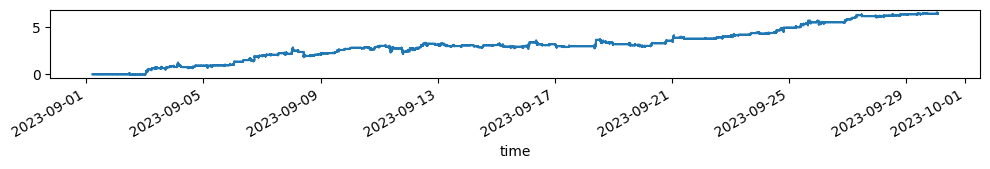

symbols: ['ZECUSDT', 'LTCUSDT']


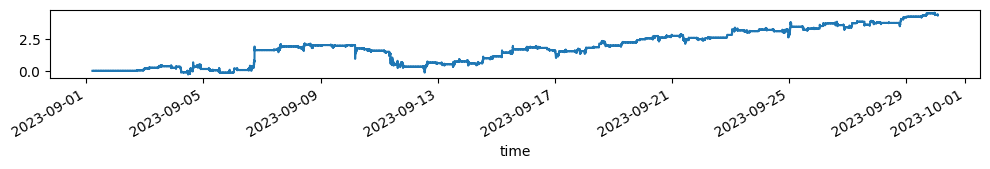

symbols: ['BNBUPUSDT', 'BNBUSDT']


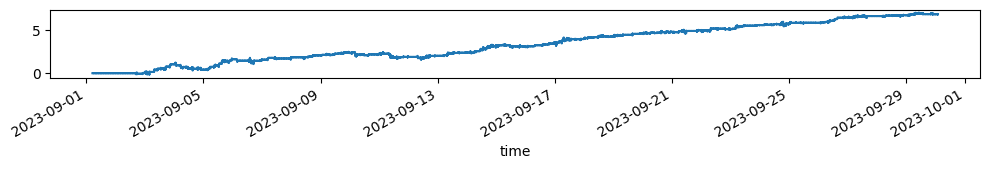

symbols: ['SSVUSDT', 'KP3RUSDT']


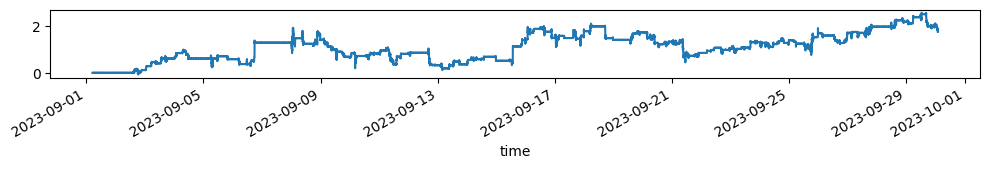

symbols: ['SOLUSDT', 'ILVUSDT']


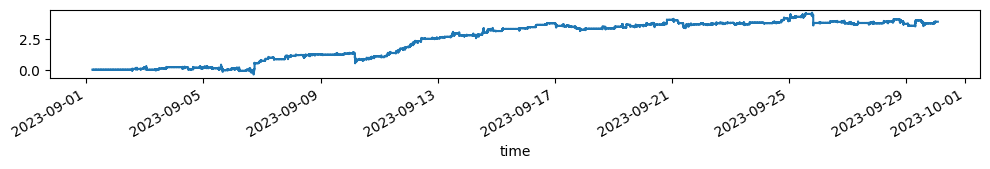

symbols: ['DASHUSDT', 'BIFIUSDT']


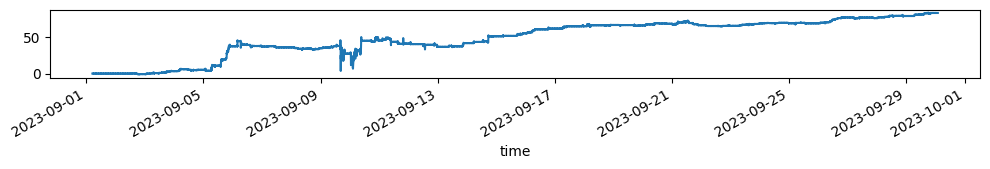

In [876]:
bband_trading_param = algo.statarbitrage.bband.BBandTradingParam(60, 2.0)
stat_arbitrage_trading_param = algo.research.simulation.StatArbitrageTradingParam(10, 180, 120, bband_trading_param)
for symbols in symbols_sets[:]:
    print(f'symbols: {symbols}')
    values_list = algo.research.simulation.get_trading_result(algo.data.read.df_gemini_202310, symbols, stat_arbitrage_trading_param, if_evecs=True)
    values_concat = pd.concat(values_list)
    ax = values_concat.profit_raw.cumsum().plot(figsize=(12, 1))
    ymin, ymax = 0, values_concat.profit_raw.cumsum().max()
    
    #ax.vlines(x=list(df_rolling_wgt_resampled.index), ymin=ymin, ymax=ymax, color='g', linestyles='dashed', label='rebalance')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == +1].index), ymin=ymin, ymax=ymax, color='b', linestyles='dashed', label='enter')
    #ax.vlines(x=list(values_concat[values_concat.position_changed == -1].index), ymin=ymin, ymax=ymax, color='r', linestyles='solid', label='leave')
    
    plt.show()